In [29]:
 pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
import pandas as pd


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [34]:
apple = pd.read_csv("apple_iphone_11_reviews.csv")
display(apple)

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI
...,...,...,...,...,...,...,...,...,...,...,...,...
5005,5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,4.0 out of 5 stars,Apple,Shreya,Dhamaka phone
5006,5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,4.0 out of 5 stars,Apple,murali hv,Good
5007,5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,5.0 out of 5 stars,Apple,Manish,Fantabulous phone. Easy to use.
5008,5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,5.0 out of 5 stars,Apple,basil john p,Fantastic


In [35]:
apple.columns

Index(['index', 'product', 'helpful_count', 'total_comments', 'url',
       'review_country', 'reviewed_at', 'review_text', 'review_rating',
       'product_company', 'profile_name', 'review_title'],
      dtype='object')

In [36]:
apple.head(10)

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI
5,5,Apple iPhone XR (64GB) - Black,313 people found this helpful,2,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-04-22,I was delivered a phone that did not work imme...,1.0 out of 5 stars,Apple,Anand S Prasad,Never purchase a phone online.
6,6,Apple iPhone XR (64GB) - Black,189 people found this helpful,3,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-07,It has been a month since I started using my i...,5.0 out of 5 stars,Apple,Srikanth Jatla,Awesome iPhone
7,7,Apple iPhone XR (64GB) - Black,164 people found this helpful,1,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-25,The phone is hanging. Video quality is not ver...,1.0 out of 5 stars,Apple,KAILASH C.,Exchange of I phone xr with xs.
8,8,Apple iPhone XR (64GB) - Black,124 people found this helpful,1,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-04-27,I'll use this review to mostly say what I'm no...,4.0 out of 5 stars,Apple,LDM,Worth upgrading from the 6S? I'll know in a fe...
9,9,Apple iPhone XR (64GB) - Black,94 people found this helpful,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-04-21,Went with the iPhone XR after over a month of ...,1.0 out of 5 stars,Apple,Amazon Customer,Def a bad experience


In [37]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            5010 non-null   int64 
 1   product          5010 non-null   object
 2   helpful_count    5010 non-null   object
 3   total_comments   5010 non-null   int64 
 4   url              5010 non-null   object
 5   review_country   5010 non-null   object
 6   reviewed_at      5010 non-null   object
 7   review_text      5007 non-null   object
 8   review_rating    5010 non-null   object
 9   product_company  5010 non-null   object
 10  profile_name     5010 non-null   object
 11  review_title     5008 non-null   object
dtypes: int64(2), object(10)
memory usage: 469.8+ KB


In [38]:
pip install nltk



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Assuming you have imported the 'apple' dataset and have the SentimentIntensityAnalyzer instantiated as 'sia'

sentiments = []
sia = SentimentIntensityAnalyzer()

for review in apple['review_text']:
  review_str = str(review)
  sentiment = sia.polarity_scores(review_str)
  sentiments.append(sentiment)


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


In [40]:
sentiment_labels = []
for sentiment in sentiments:
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        sentiment_labels.append('Positive')
    elif compound_score <= -0.05:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

In [41]:
apple['sentiment'] = sentiment_labels

In [42]:
apple[['review_text', 'sentiment']]

,review_text,sentiment
0,NOTE:,Neutral
1,Very bad experience with this iPhone xr phone....,Negative
2,Amazing phone with amazing camera coming from ...,Positive
3,So I got the iPhone XR just today. The product...,Positive
4,I've been an android user all my life until I ...,Positive
...,...,...
5005,Dhamaka,Neutral
5006,Goodbye,Neutral
5007,Nothing,Neutral
5008,Superbb,Neutral


In [43]:
X = apple['review_text']
y = apple['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Create the TfidfVectorizer and transform the training and test data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [45]:
model = SVC()
model.fit(X_train_tfidf, y_train)

SVC()

In [46]:
y_pred = model.predict(X_test_tfidf)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8562874251497006
Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.36      0.51       101
     Neutral       0.77      0.45      0.57       127
    Positive       0.86      0.99      0.92       774

    accuracy                           0.86      1002
   macro avg       0.84      0.60      0.67      1002
weighted avg       0.85      0.86      0.83      1002



In [48]:
def predict_sentiment(review):
    review_tfidf = vectorizer.transform([review])
    sentiment = model.predict(review_tfidf)
    return sentiment[0]

In [49]:
new_review = "Amazing phone with amazing camera coming from iPhone 7 plus great service from amazon"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Positive


In [50]:
new_review2 = "Very bad experience with this iPhone xr phone. Back camera found defective and non functional. Amazon is very careless. I haven't got any response on confirmation for replacing. I am just hanging with a damaged piece worth of more than 91000 rupees."
predicted_sentiment = predict_sentiment(new_review2)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Negative


In [51]:
new_review3 = "NOTE:"
predicted_sentiment = predict_sentiment(new_review3)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Neutral


In [52]:
pip install streamlit


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump (model, pickle_out) 
pickle_out.close ()

In [54]:
apple.sentiment.value_counts()

sentiment
Positive    3837
Neutral      684
Negative     489
Name: count, dtype: int64

In [55]:
Sentiment_count=apple.groupby('sentiment').count()
print(Sentiment_count)

           index  product  helpful_count  total_comments   url  \
sentiment                                                        
Negative     489      489            489             489   489   
Neutral      684      684            684             684   684   
Positive    3837     3837           3837            3837  3837   

           review_country  reviewed_at  review_text  review_rating  \
sentiment                                                            
Negative              489          489          489            489   
Neutral               684          684          681            684   
Positive             3837         3837         3837           3837   

           product_company  profile_name  review_title  
sentiment                                               
Negative               489           489           489  
Neutral                684           684           682  
Positive              3837          3837          3837  


<function matplotlib.pyplot.show(close=None, block=None)>

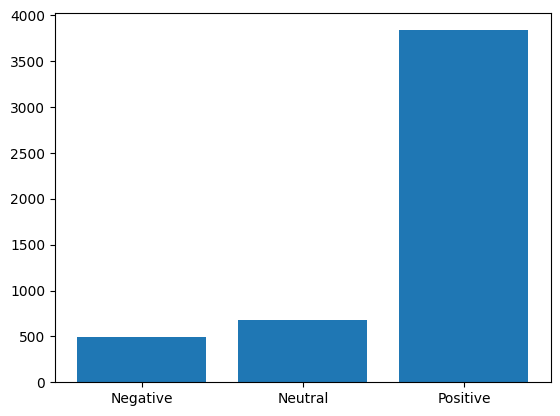

In [56]:
plt.bar (Sentiment_count.index.values, Sentiment_count ['review_text'])
plt.show